## Sentimental Analysis


In [17]:
#import neccesary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

## Data Colection

In [18]:
#Read the input data
data = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip', quoting=3) # add on_bad_lines='skip' to skip problematic lines and quoting=3 for double quotes recognition
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [19]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
...,...,...,...,...,...,...,...,...,...,...
20352,78693,B00472I5A4,A2933AO5D7O1T6,C. Blackwell,1,1,5,1327622400,Best salt & vinegar chips out there!,Salt & vinegar chips are my favorite flavor so...
20353,78695,B00472I5A4,A2II09GQGWOMTQ,"""Brian Nallick """"METALMANMN""""""",1,1,5,1309478400,Crunchy and spicy.,If you love jalapeno chips then Kettle is a mu...
20354,78703,B00472I5A4,A2N10M1J3KJZK4,MT_Soul,1,1,5,1249084800,These chips will make you fat,But you will enjoy ever step. I gained 5 lbs w...
20355,78715,B00472I5A4,A2YKWYC3WQJX5J,"""Shannie """"Shan""""""",1,1,5,1212451200,Caution: Kettle Chips are addictive!,These really are amazing chips. Don't be put o...


In [20]:
data = data.head(500)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
...,...,...,...,...,...,...,...,...,...,...
495,1751,B001RVFDOO,A3411K5L6QNVH7,"""Maria Garcia """"mticasgarcia""""""",0,0,5,1274054400,LOVE THIS PRODUCT,I love popchips and especially when they are i...
496,1762,B001RVFDOO,ALW9FYJ9MO0G5,ShoeAddict,0,0,5,1266883200,Great chip substitute!,I love these chips...and my husband does too. ...
497,1764,B001RVFDOO,A3OGMH21RUA7CY,"""Christine M. York """"Chris""""""",0,0,5,1264896000,Great Chips,Pop Chips are the best chips I've had in a lon...
498,1767,B001RVFDOO,A2V5K8PMLV1WOO,Florence Mason,0,0,5,1264032000,CHIP LOVER,"""I love these chips. They are excellent! On th..."


In [21]:
data['Text'].values

array(['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
       '"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."',
       'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.',
       "Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too",
       'This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.',
 

In [22]:
data.shape

(500, 10)

## EDA

In [23]:
data['Score']

,Score
0,5
1,1
2,2
3,5
4,5
...,...
495,5
496,5
497,5
498,5


In [24]:
data['Score'].value_counts()

,count
Score,
5,350
4,63
1,42
3,30
2,15


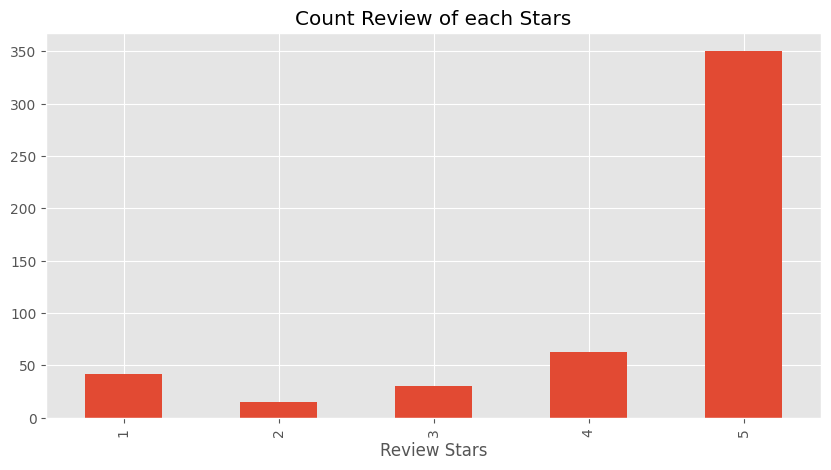

In [25]:
data['Score'].value_counts().sort_index()
ax = data['Score'].value_counts().sort_index().plot(kind='bar' , title='Count Review of each Stars' , figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

## Basics of NLTK

In [26]:
review = data['Text'][50]
review

'AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.'

In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
tokens = nltk.word_tokenize(review)
tokens[:10]

['AWESOME', '!', '!', '!', 'such', 'a', 'yummy', 'flavor', 'I', 'got']

In [29]:
# Download the required resource
nltk.download('averaged_perceptron_tagger_eng')

# Now you can use the pos_tag function
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('AWESOME', 'RB'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('yummy', 'JJ'),
 ('flavor', 'NN'),
 ('I', 'PRP'),
 ('got', 'VBD')]

In [30]:
# Download the 'maxent_ne_chunker' dataset
nltk.download('maxent_ne_chunker')

# Download the maxent_ne_chunker_tab dataset
nltk.download('maxent_ne_chunker_tab')

# Now you can use the ne_chunk function
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


(S
  AWESOME/RB
  !/.
  !/.
  !/.
  such/PDT
  a/DT
  yummy/JJ
  flavor/NN
  I/PRP
  got/VBD
  it/PRP
  as/IN
  a/DT
  healthy/JJ
  alternative/NN
  to/TO
  the/DT
  desserts/NNS
  we/PRP
  normally/RB
  eat/VBP
  and/CC
  I/PRP
  am/VBP
  so/RB
  glad/JJ
  that/IN
  I/PRP
  did/VBD
  there/EX
  are/VBP
  so/RB
  many/JJ
  things/NNS
  you/PRP
  can/MD
  do/VB
  with/IN
  (PERSON Jello/NNP)
  desserts/NNS
  and/CC
  still/RB
  have/VB
  them/PRP
  taste/VB
  good/JJ
  and/CC
  be/VB
  good/JJ
  for/IN
  you/PRP
  ./.
  I/PRP
  will/MD
  definitentally/RB
  be/VB
  purchasing/VBG
  this/DT
  product/NN
  again/RB
  the/DT
  flavor/NN
  was/VBD
  so/RB
  wonderful/JJ
  ./.)


##VADER Seniment Scoring

---
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a tool used for sentiment analysis. It's bag of words approach

The SentimentIntensityAnalyzer, part of the VADER toolkit, is designed for sentiment analysis. It evaluates the polarity (positive, negative, neutral) and intensity of emotions in text, making it highly effective for analyzing social media and short informal text.

In [31]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [32]:
sia

In [33]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [34]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [35]:
sia.polarity_scores(review)

{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

In [36]:
#Run the Polarity Score on the entire dataset
results = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Text']
    myid = row['Id']
    # Check if text is NaN and replace with empty string if necessary
    if pd.isnull(text):
        text = ''
    results[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [37]:
results

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 17: {'neg': 0.097, 'neu': 0.694, 'pos': 0.209, 'compound': 0.7481},
 18: {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8883},
 20: {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.6077},
 23: {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7687},
 24: {'neg': 0.085, 'neu': 0.771, 'pos': 0.143, 'compound': 0.2617},
 28: {'neg': 0.04, 'neu': 0.808, 'pos': 0.152, 'compound': 0.5956},
 43: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9441},
 45: {'neg': 0.031, 'neu': 0.778, 'pos': 0.191, 'compound': 0.8421}

In [38]:
#Making the Dictionary to DataFrames
pd.DataFrame(results).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
4,0.000,1.000,0.000,0.0000
9,0.000,0.851,0.149,0.6369
10,0.000,0.705,0.295,0.8313
...,...,...,...,...
1751,0.000,0.716,0.284,0.9098
1762,0.000,0.694,0.306,0.9552
1764,0.000,0.814,0.186,0.8765
1767,0.000,0.673,0.327,0.9822


In [39]:
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(data, how='left')

In [40]:
#Now we have sentiment score and metadata
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1751,0.000,0.716,0.284,0.9098,B001RVFDOO,A3411K5L6QNVH7,"""Maria Garcia """"mticasgarcia""""""",0,0,5,1274054400,LOVE THIS PRODUCT,I love popchips and especially when they are i...
496,1762,0.000,0.694,0.306,0.9552,B001RVFDOO,ALW9FYJ9MO0G5,ShoeAddict,0,0,5,1266883200,Great chip substitute!,I love these chips...and my husband does too. ...
497,1764,0.000,0.814,0.186,0.8765,B001RVFDOO,A3OGMH21RUA7CY,"""Christine M. York """"Chris""""""",0,0,5,1264896000,Great Chips,Pop Chips are the best chips I've had in a lon...
498,1767,0.000,0.673,0.327,0.9822,B001RVFDOO,A2V5K8PMLV1WOO,Florence Mason,0,0,5,1264032000,CHIP LOVER,"""I love these chips. They are excellent! On th..."


##Plot VADER Results

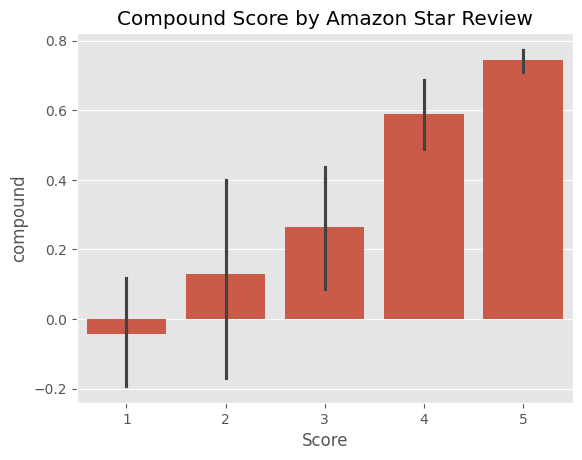

In [41]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

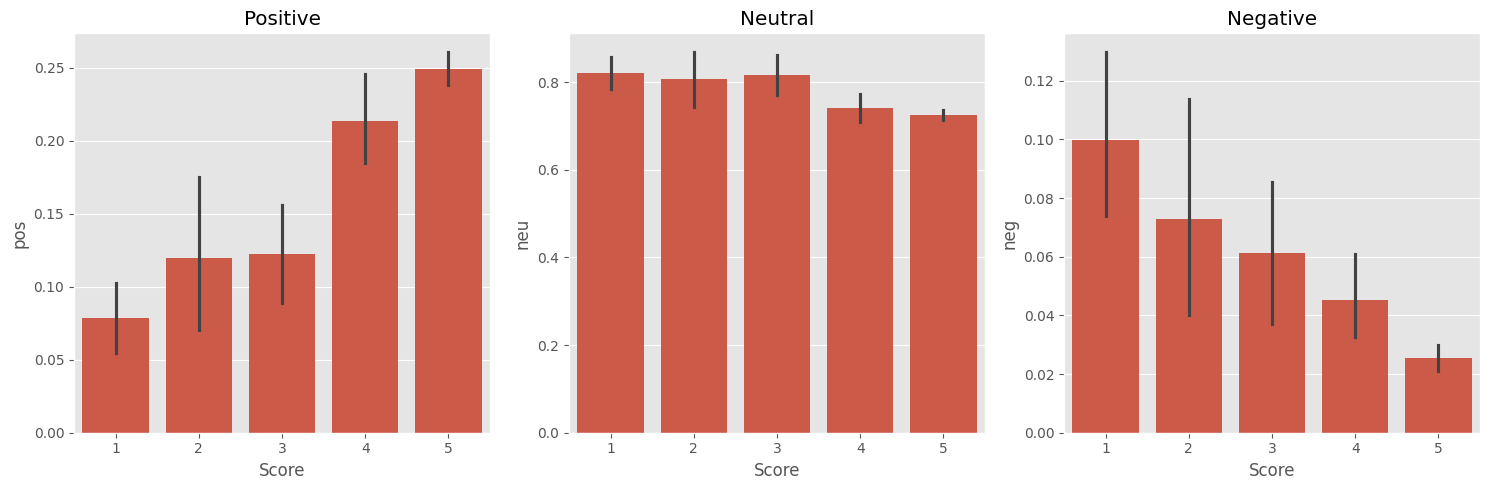

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


##RoBERTa model (Robustly Optimized BERT Pretraining Approach)

It is pretrained on a large corpus of English data using a masked language modeling (MLM) objective

RoBERTa is trained with larger batches and higher learning rates, which contributes to its enhanced performance

In [43]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [44]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [45]:
#VADER results on review
print(review)
sia.polarity_scores(review)

AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.


{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

In [46]:
#Running the model in Roberta
encoded_text = tokenizer(review, return_tensors='pt')
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.2262, -1.0303,  4.1858]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [47]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00163009, 0.00539006, 0.9929798 ], dtype=float32)

In [48]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0016300862, 'roberta_neu': 0.0053900606, 'roberta_pos': 0.9929798}


In [49]:
def polarity_scores_roberta(review):
   encoded_text = tokenizer(review, return_tensors='pt')
   output = model(**encoded_text)
   scores = output[0][0].detach().numpy()
   scores = softmax(scores)
   scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
   }
   return scores_dict

In [51]:
results = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_results = sia.polarity_scores(text)
        vader_results_rename = {}
        for key, value in vader_results.items():
            vader_results_rename[f"vader_{key}"] = value
        roberta_results = polarity_scores_roberta(text)
        vader_and_roberta = {**vader_results_rename, **roberta_results}
        results[myid] = vader_and_roberta
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [52]:
results_data = pd.DataFrame(results).T
results_data = results_data.reset_index().rename(columns={'index': 'Id'})
results_data = results_data.merge(data, how='left')

In [53]:
results_data

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.489171,0.465882,0.044946,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,0.003874,0.094156,0.901970,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,0.003103,0.055912,0.940984,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1751,0.000,0.716,0.284,0.9098,0.001250,0.008631,0.990118,B001RVFDOO,A3411K5L6QNVH7,"""Maria Garcia """"mticasgarcia""""""",0,0,5,1274054400,LOVE THIS PRODUCT,I love popchips and especially when they are i...
496,1762,0.000,0.694,0.306,0.9552,0.002042,0.010742,0.987217,B001RVFDOO,ALW9FYJ9MO0G5,ShoeAddict,0,0,5,1266883200,Great chip substitute!,I love these chips...and my husband does too. ...
497,1764,0.000,0.814,0.186,0.8765,0.002048,0.017554,0.980398,B001RVFDOO,A3OGMH21RUA7CY,"""Christine M. York """"Chris""""""",0,0,5,1264896000,Great Chips,Pop Chips are the best chips I've had in a lon...
498,1767,0.000,0.673,0.327,0.9822,0.001744,0.006418,0.991838,B001RVFDOO,A2V5K8PMLV1WOO,Florence Mason,0,0,5,1264032000,CHIP LOVER,"""I love these chips. They are excellent! On th..."


##Combine and Compare

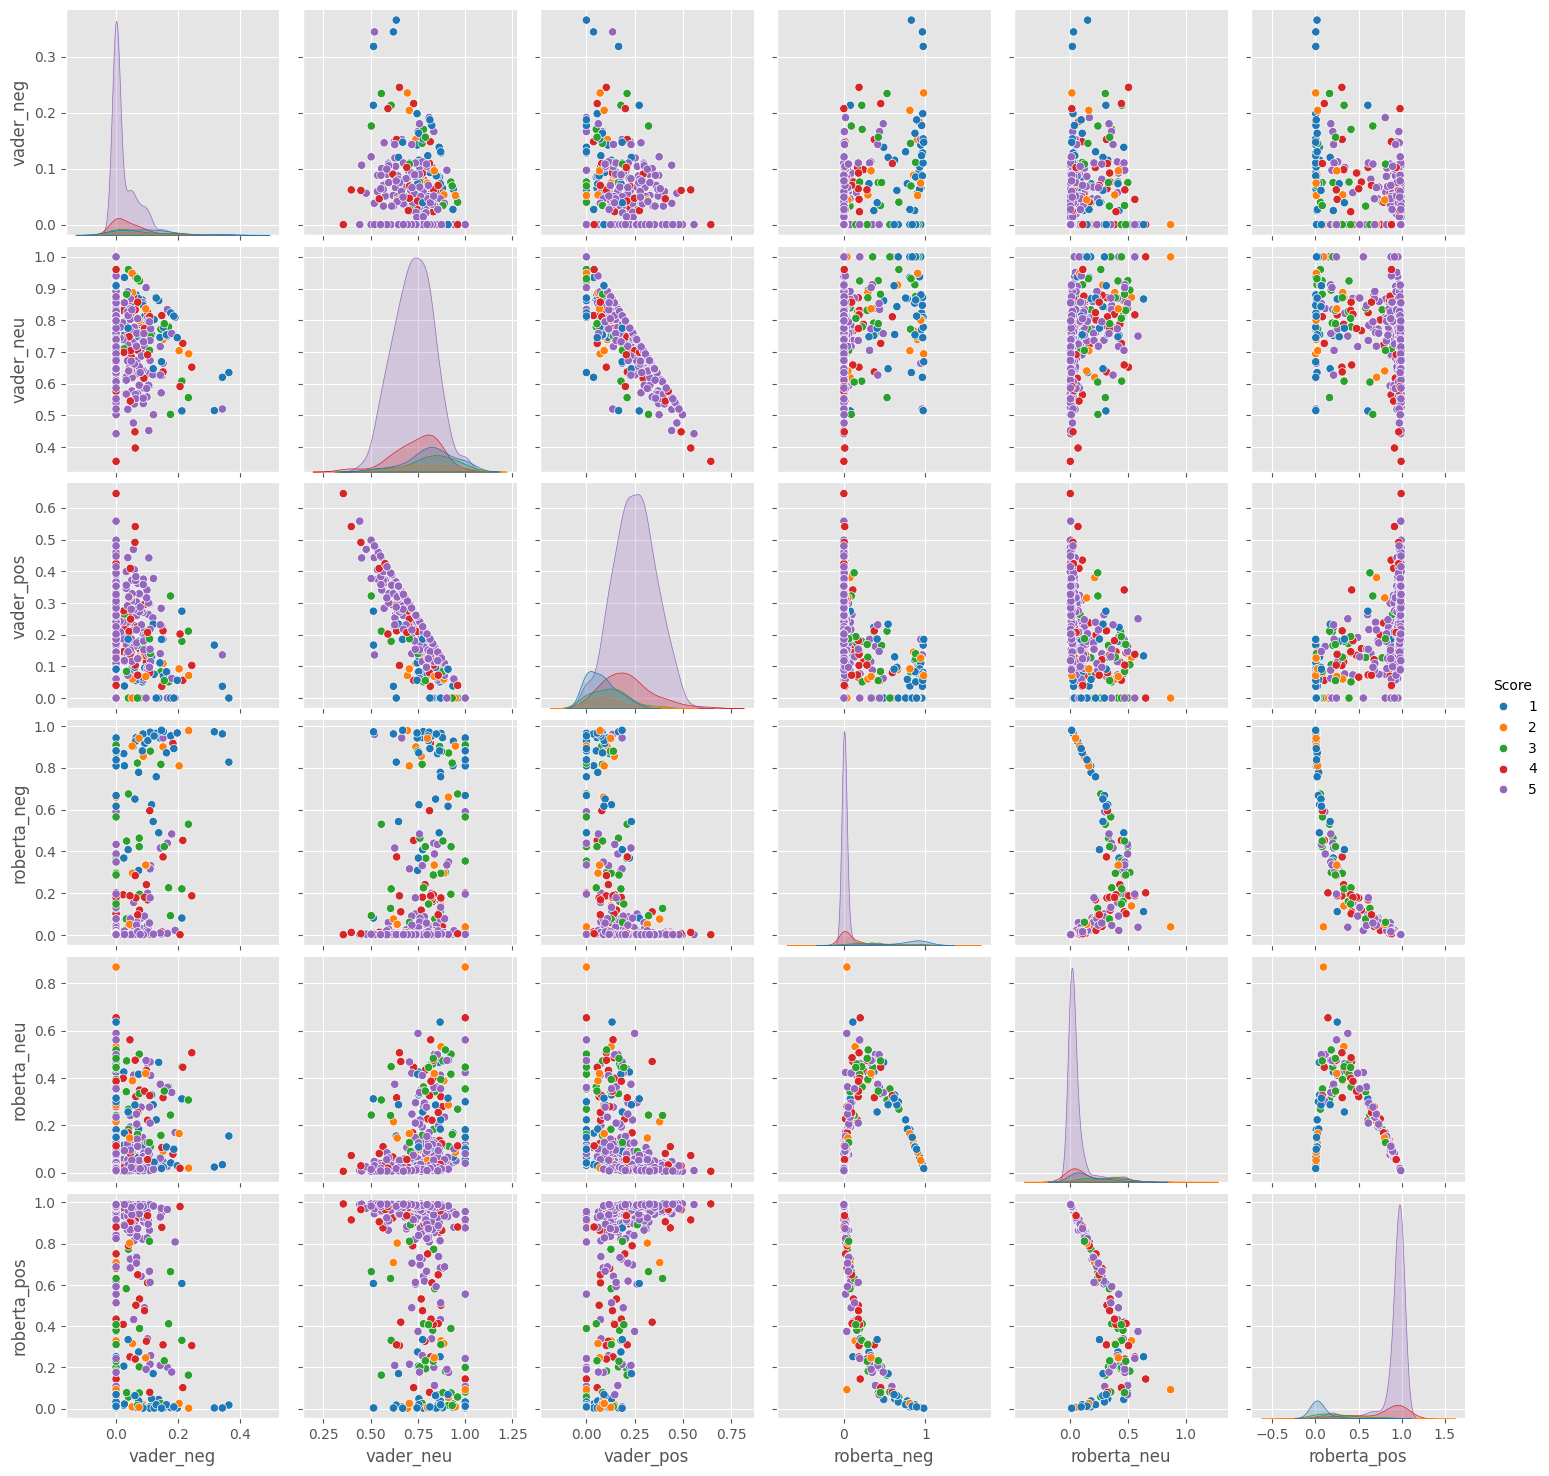

In [54]:
sns.pairplot(data=results_data,vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu',
             'roberta_pos'], hue='Score', palette='tab10')
plt.show()

##Review the Data

In [55]:
results_data.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text']

,Text
251,I just wanted to post here that I found small ...
89,So we cancelled the order. It was cancelled w...
433,Found this product for sale on vacation in Nor...
279,Coffee beans did not seem fresh. No oil on th...
143,I ORDERED KETTLE CHIPS IN THE FOLLOWING FLAVVO...
53,Seriously this product was as tasteless as the...
294,These had heat and had good enough coating of ...
439,I read the reviews on this and thought id get ...
396,"""i found this product doing a search for """"edi..."
144,"""Unless you really really really like vinegar ..."


In [56]:
#positive reviews with 1 star rating on roberta
results_data.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [57]:
#positive reviews with 1 star rating on vader
results_data.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [58]:
#positive reviews with 5 star rating on roberta
results_data.query('Score == 5').sort_values('roberta_pos', ascending=False)['Text'].values[0]

"These are my favorite bars ever. The combo of raisons and dark choc is wonderful! Very filling! These are hard to find in the stores. I'm thankful for subsrcibe and save!"

In [59]:
#positive reviews with 5 star rating on vader
results_data.query('Score == 5').sort_values('vader_pos', ascending=False)['Text'].values[0]

"This cinnamon cake loaf has a wonderful natural flavor.  It's moist and tender and a great little sweet treat when you want something that isn't terribly bad for your diet.  It's delicious!"

In [60]:
#Negative reviews with 1 star rating on roberta
results_data.query('Score == 1').sort_values('roberta_neg', ascending=False)['Text'].values[0]

"This coffee is absolutely horrendous.  I cannot believe it has any favorable reviews and agree with the other reviewer who believes positive reviews were written by employees.  I cannot stress enough how bad this coffee is.  It doesn't even taste like coffee.  The best way to describe it is a cup of chemicals.  I am really bummed I cannot returned this.  A complete waste of money.  It all went in the garbage."

In [61]:
#Negative reviews with 1 star rating on vader
results_data.query('Score == 1').sort_values('vader_neg', ascending=False)['Text'].values[0]

'The laddoos turned bad in a few days after we received it. No other item inside our fridge turned bad.'

In [62]:
#Negative reviews with 5 star rating on roberta
results_data.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [63]:
#Negative reviews with 5 star rating on vader
results_data.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

##The Transformers Pipeline

In [64]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [65]:
sent_pipeline('I am so happy')

[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

In [66]:
sent_pipeline('I am so sad')

[{'label': 'NEGATIVE', 'score': 0.9993782043457031}]

In [67]:
sent_pipeline('I Love Ice Cream')

[{'label': 'POSITIVE', 'score': 0.9998118281364441}]

In [68]:
sent_pipeline(review)

[{'label': 'POSITIVE', 'score': 0.9998469352722168}]